In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/My Drive/다핏문제/906/dataset_37_diabetes.csv")
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [4]:
presd = data.replace({'pres':0},{'pres':None})
presd1 = presd.dropna()
presd = data.replace({'pres':0}, {'pres':None})
presd = presd.fillna(presd1.pres.median())

massd = presd.replace({'mass':0.0},{'mass':None})
massd1 = massd.dropna()
massd = data.replace({'mass':0.0},{'mass':None})
massd = massd.fillna(massd1.mass.median())

plasd = massd.replace({'plas':0}, {'plas':None})
plasd1 = plasd.dropna()
data = plasd.fillna(plasd1.plas.median())
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [5]:
col = list(map(str, data.columns))
x = data[col[:-1]]
y = data[col[-1]]
print(x, y)

     preg  plas  pres  skin  insu  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
..    ...   ...   ...   ...   ...   ...    ...  ...
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
766     1   126    60     0     0  30.1  0.349   47
767     1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns] 0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
763    tested_negative
764    tested_negative
765    tested_negative
766    tested_positive
767    tested_negative
Name: class, Length: 768, dtype: object


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size=0.5)

#Decision Tree

In [0]:
dTree = DecisionTreeClassifier(max_depth=3,random_state=0).fit(x_train,y_train)

In [21]:
print("train score : {}".format(dTree.score(x_train, y_train)))
print("val score : {}".format(dTree.score(x_val, y_val)))

train score : 0.7869565217391304
val score : 0.7077922077922078


In [22]:
#print("test score : {}".format(dTree.score(x_test,y_test)))
predict_y = dTree.predict(x_test)
predict_y

from sklearn.metrics import classification_report
print(classification_report(y_test, dTree.predict(x_test)))
print("test score : {}".format(dTree.score(x_test, y_test)))

                 precision    recall  f1-score   support

tested_negative       0.65      0.95      0.78        87
tested_positive       0.85      0.34      0.49        67

       accuracy                           0.69       154
      macro avg       0.75      0.65      0.63       154
   weighted avg       0.74      0.69      0.65       154

test score : 0.6883116883116883


In [0]:
 import graphviz
 from sklearn.tree import export_graphviz

In [24]:
export_graphviz(dTree, out_file='tree.dot', class_names=['positive','negative'], feature_names=data.columns[:-1], impurity=False, filled=True)

with open('tree.dot') as file_reader:
    dot_graph = file_reader.read()

dot = graphviz.Source(dot_graph)
dot.render(filename='tree.png')

'tree.png.pdf'

#Random Forest

In [0]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train,y_train)

In [33]:
print("train score : {}".format(rf.score(x_train, y_train)))
print("val score : {}".format(rf.score(x_val, y_val)))

train score : 1.0
val score : 0.7402597402597403


In [27]:
#print("test score : {}".format(dTree.score(x_test,y_test)))
predict_y = rf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))
print("test score : {}".format(rf.score(x_test, y_test)))

                 precision    recall  f1-score   support

tested_negative       0.74      0.90      0.81        87
tested_positive       0.82      0.60      0.69        67

       accuracy                           0.77       154
      macro avg       0.78      0.75      0.75       154
   weighted avg       0.77      0.77      0.76       154

test score : 0.7662337662337663


In [0]:
tree_im = dTree.feature_importances_
rf_im = rf.feature_importances_

In [36]:
tree_im

array([0.        , 0.5347359 , 0.        , 0.        , 0.04173921,
       0.21565979, 0.        , 0.2078651 ])

In [37]:
rf_im

array([0.08952293, 0.25399462, 0.08681098, 0.0670654 , 0.07442073,
       0.15672029, 0.12566406, 0.14580099])

In [0]:
tree_im = pd.Series(tree_im, col[:-1])

In [0]:
rf_im = pd.Series(rf_im, col[:-1])

In [0]:
import numpy as np

In [66]:
print(tree_im,"\n\n\n", rf_im)

preg    0.000000
plas    0.534736
pres    0.000000
skin    0.000000
insu    0.041739
mass    0.215660
pedi    0.000000
age     0.207865
dtype: float64 


 preg    0.089523
plas    0.253995
pres    0.086811
skin    0.067065
insu    0.074421
mass    0.156720
pedi    0.125664
age     0.145801
dtype: float64


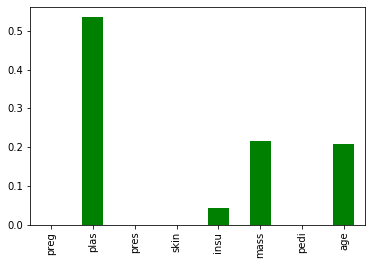

In [68]:
tree_im.plot(kind="bar", color="g")

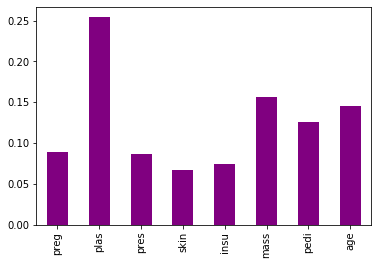

In [54]:
rf_im.plot(kind="bar", color="purple")

Decision Tree와 Random Forest 모두 **plas (임당 시험 2시간 경과 후의 혈당 수치)**가 당뇨 예측에 가장 중요한 feature임.

그리고 두 알고리즘 모두 plas 다음으로 mass와 age가 중요성이 높은것으로 나타났다.

차이점은 decision tree에서는 plas 항목이 0.53으로 importance가 월등히 높고 mass, age가 0.2x로 그 다음으로 높았으며 insu이 0.041 정도의 값으로 나타났다.
그러나 random forest에서는 insu가 0.07로 decision tree에서는 0.0으로 나왔던 preg, press, pedi와 같은 항목들보다 낮은 값이 나왔다.
random forest에서는 pedi 항목이 mass와 age 다음으로 예측에 중요한 feature로 나타남.